# EDA of the official gex CITE-seq dataset

This is draft EDA with not full official dataset. Be cautious.

In [1]:
import anndata as ad
import scanpy as sc
import numpy as np
import seaborn as sns

from lab_scripts.utils import utils
utils.change_directory_to_repo()

sc.settings.verbosity = 3  # show info messages
sc.set_figure_params(figsize=(5, 3))  # set figsize for plots


In [2]:
data = ad.read_h5ad("data/official/common/openproblems_bmmc_cite_phase1/openproblems_bmmc_cite_phase1.manual_formatting.output_rna.h5ad")

In [3]:
data

AnnData object with n_obs × n_vars = 43890 × 13953
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'size_factors', 'phase', 'cell_type', 'pseudotime_order_GEX', 'batch', 'pseudotime_order_ADT', 'is_train'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells-s1d1', 'highly_variable-s1d1', 'n_cells-s1d2', 'highly_variable-s1d2', 'n_cells-s1d3', 'highly_variable-s1d3', 'n_cells-s2d1', 'highly_variable-s2d1', 'n_cells-s2d4', 'highly_variable-s2d4', 'n_cells-s3d6', 'highly_variable-s3d6', 'n_cells-s3d7', 'highly_variable-s3d7'
    uns: 'dataset_id', 'organism'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

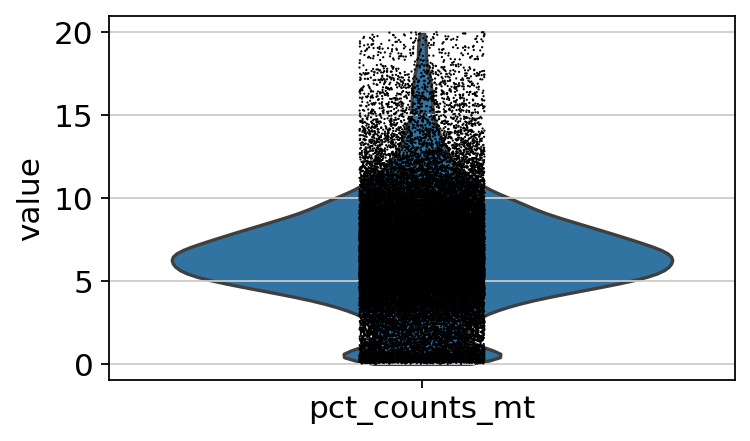

In [4]:
sc.pl.violin(data, 'pct_counts_mt')

In [5]:
data.obs['n_genes_by_counts']

GCATTAGCATAAGCGG-1-s1d1     893
TACAGGTGTTAGAGTA-1-s1d1    2606
AGGATCTAGGTCTACT-1-s1d1    1867
GTAGAAAGTGACACAG-1-s1d1    2360
TCCGAAAAGGATCATA-1-s1d1     455
                           ... 
GTGTAACCATTAAGCC-1-s3d7    1879
CAGCCAGCAACGCATT-1-s3d7    1640
TCAGCAAAGGTCGTAG-1-s3d7     153
ATCACAGTCGCCAACG-1-s3d7     822
TTATTGCAGGTAGCCA-1-s3d7    1676
Name: n_genes_by_counts, Length: 43890, dtype: int32

In [6]:
data.obs

,n_genes_by_counts,pct_counts_mt,size_factors,phase,cell_type,pseudotime_order_GEX,batch,pseudotime_order_ADT,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,Naive CD20+ B IGKC+,NaN,s1d1,NaN,True
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,CD14+ Mono,NaN,s1d1,NaN,True
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,Naive CD20+ B IGKC+,NaN,s1d1,NaN,True
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,HSC,0.000000,s1d1,NaN,True
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,Reticulocyte,0.964631,s1d1,0.735261,True
...,...,...,...,...,...,...,...,...,...
GTGTAACCATTAAGCC-1-s3d7,1879,7.053232,1.254860,G2M,CD14+ Mono,NaN,s3d7,NaN,False
CAGCCAGCAACGCATT-1-s3d7,1640,6.559514,1.068252,G2M,CD14+ Mono,NaN,s3d7,NaN,False
TCAGCAAAGGTCGTAG-1-s3d7,153,0.085660,0.014308,G1,Reticulocyte,0.942716,s3d7,0.938854,False
ATCACAGTCGCCAACG-1-s3d7,822,7.060850,0.409965,G1,CD14+ Mono,NaN,s3d7,NaN,False


In [7]:
# Non-normalized counts
data.obs["n_counts"] = np.asarray(np.sum(data.layers['counts'], axis=1)).reshape(-1)
data.obs["n_genes"] = np.asarray(np.sum((data.layers['counts'] > 0), axis=1)).reshape(-1)

In [8]:
data.obs

,n_genes_by_counts,pct_counts_mt,size_factors,phase,cell_type,pseudotime_order_GEX,batch,pseudotime_order_ADT,is_train,n_counts,n_genes
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,Naive CD20+ B IGKC+,NaN,s1d1,NaN,True,3250.0,888
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,CD14+ Mono,NaN,s1d1,NaN,True,6305.0,2573
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,Naive CD20+ B IGKC+,NaN,s1d1,NaN,True,5175.0,1857
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,HSC,0.000000,s1d1,NaN,True,7053.0,2319
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,Reticulocyte,0.964631,s1d1,0.735261,True,15939.0,452
...,...,...,...,...,...,...,...,...,...,...,...
GTGTAACCATTAAGCC-1-s3d7,1879,7.053232,1.254860,G2M,CD14+ Mono,NaN,s3d7,NaN,False,5243.0,1864
CAGCCAGCAACGCATT-1-s3d7,1640,6.559514,1.068252,G2M,CD14+ Mono,NaN,s3d7,NaN,False,4594.0,1631
TCAGCAAAGGTCGTAG-1-s3d7,153,0.085660,0.014308,G1,Reticulocyte,0.942716,s3d7,0.938854,False,5836.0,152
ATCACAGTCGCCAACG-1-s3d7,822,7.060850,0.409965,G1,CD14+ Mono,NaN,s3d7,NaN,False,1738.0,819


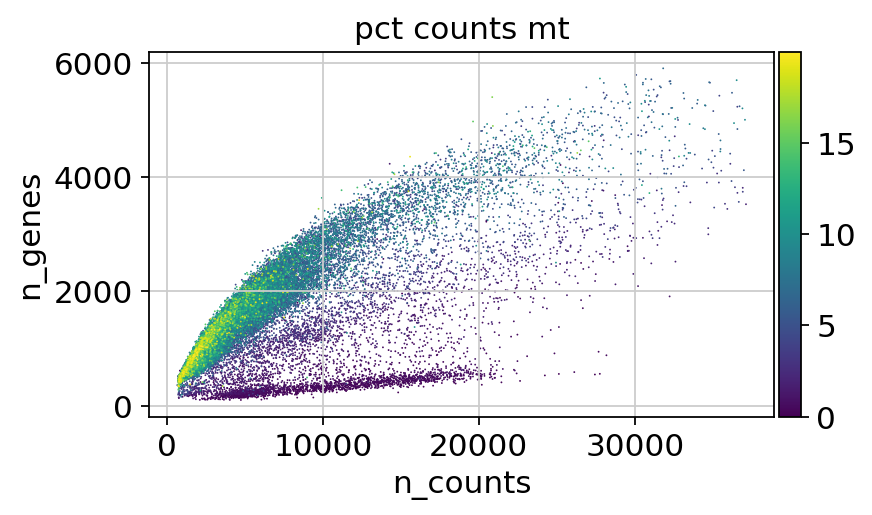

In [9]:
sc.pl.scatter(data, x='n_counts', y='n_genes', color='pct_counts_mt')

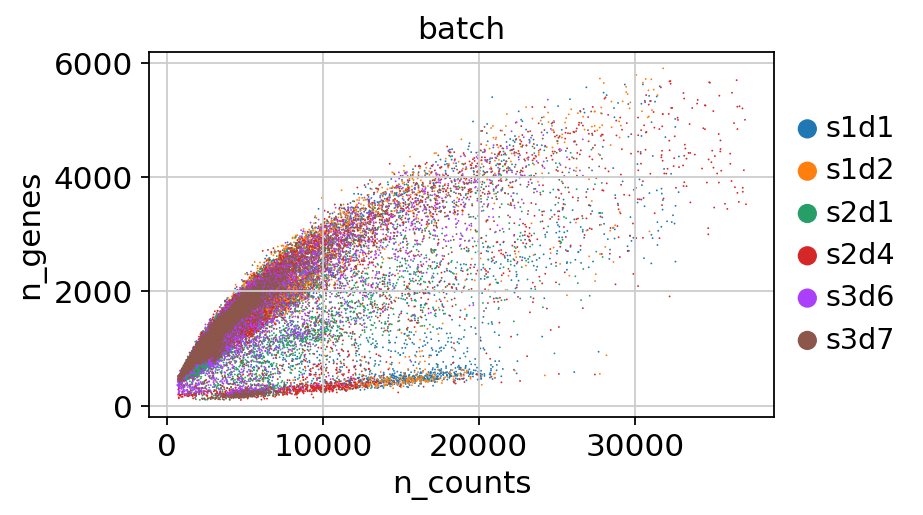

In [10]:
sc.pl.scatter(data, x='n_counts', y='n_genes', color='batch')

computing PCA
    with n_comps=50
    finished (0:00:50)


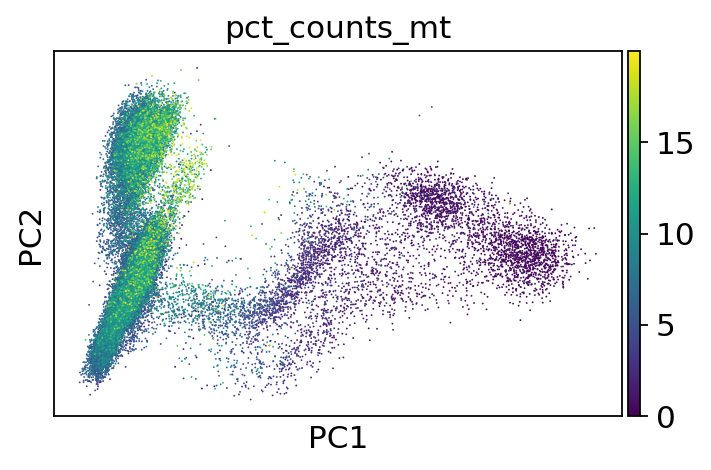

In [11]:
# Normalized data
sc.tl.pca(data)
sc.pl.pca(data, color='pct_counts_mt')

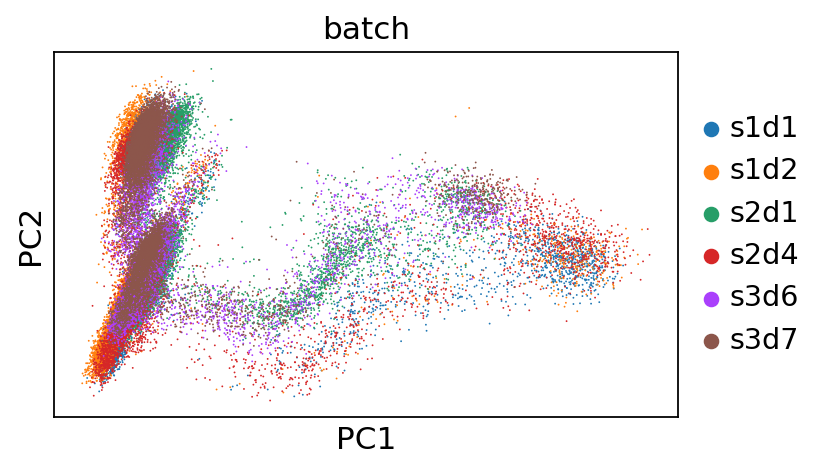

In [12]:
sc.pl.pca(data, color='batch')

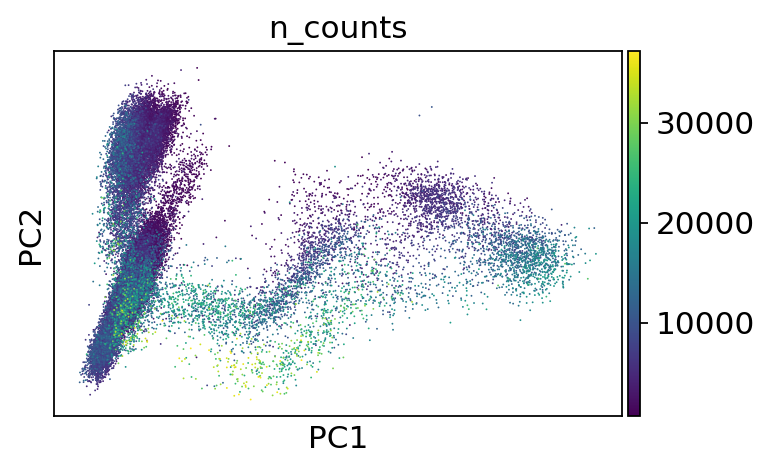

In [13]:
sc.pl.pca(data, color='n_counts')

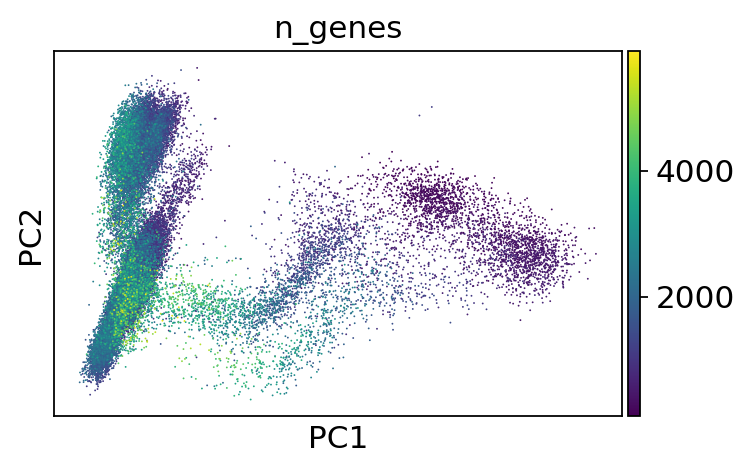

In [14]:
sc.pl.pca(data, color='n_genes')

### Batch Correction

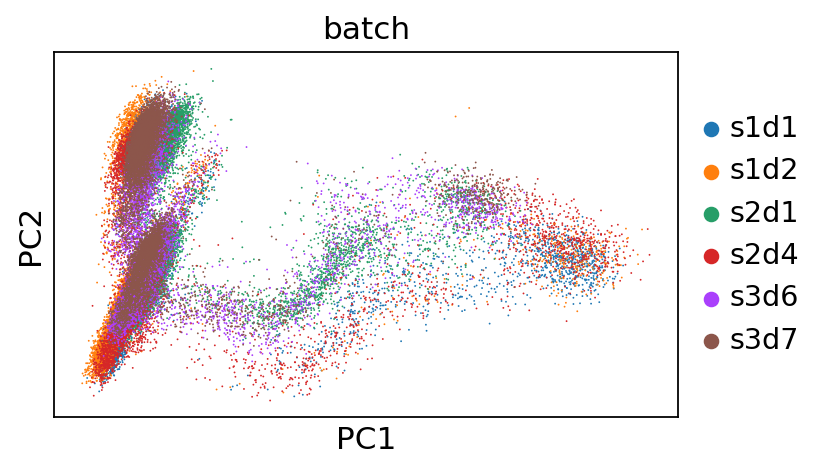

In [15]:
sc.pl.pca(data, color='batch')

In [16]:
sc.tl.tsne(data)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:54)


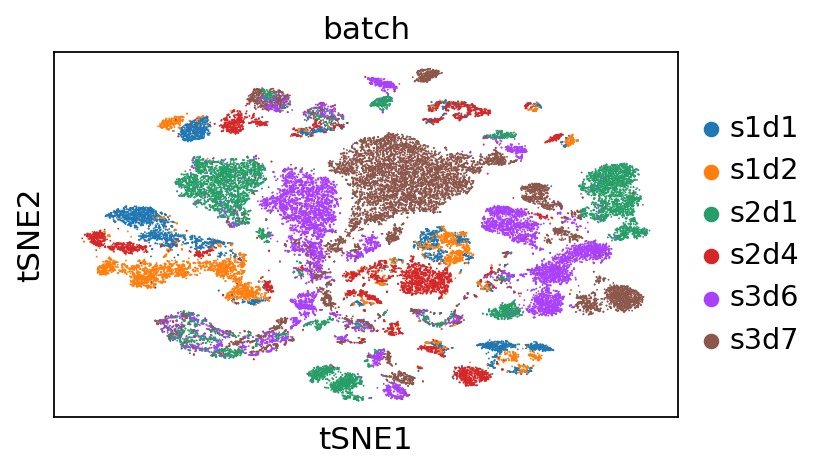

In [17]:
sc.pl.tsne(data, color='batch')

Strong batch effect

In [18]:
sc.pp.combat(data, key='batch')

Standardizing Data across genes.

Found 6 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



computing PCA
    with n_comps=50
    finished (0:01:21)


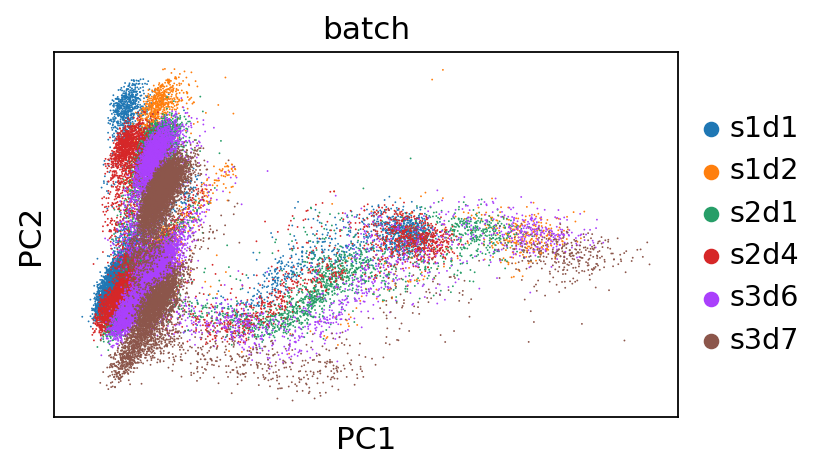

In [19]:
# Normalized data
sc.tl.pca(data)
sc.pl.pca(data, color='batch')

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:57)


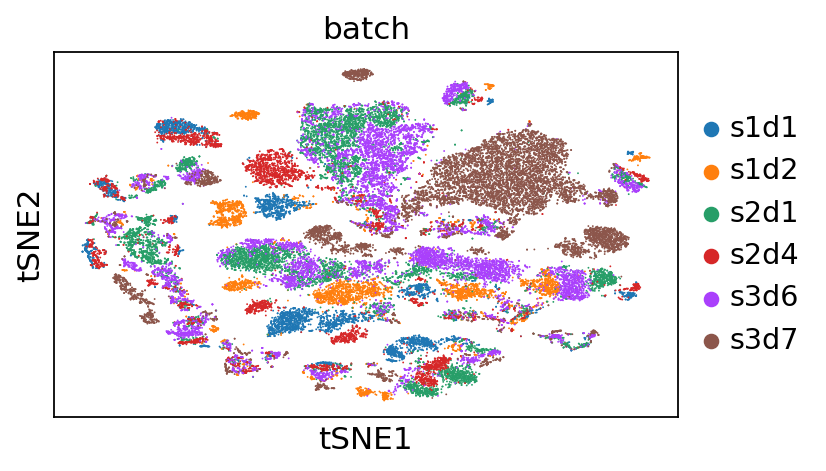

In [21]:
sc.tl.tsne(data)
sc.pl.tsne(data, color='batch')

Combat only made it worse!